In [8]:
!pip install pandas matplotlib seaborn yfinance

In [9]:
 import pandas as pd
 import numpy as np
 import yfinance as yf
 import seaborn as sns
 from matplotlib import pyplot as plt

In [10]:
import datetime 

df = yf.download("QCOM", start="2011-01-01", end="2021-09-23") 
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,16.650000,16.830000,16.610001,16.790001,11.381508,22417600
2011-01-03,17.020000,17.309999,17.000000,17.250000,11.693329,70794200
2011-01-04,17.389999,17.660000,16.959999,17.379999,11.781452,106477200
2011-01-05,17.309999,18.090000,17.219999,17.889999,12.127168,112378000
2011-01-06,18.030001,18.290001,17.950001,18.219999,12.350866,96284400


In [11]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [12]:
df['SMA_50'] = df['Adj Close'].rolling(50).mean()

# the simple moving average over a period of 20 year
df['SMA_200'] = df['Adj Close'].rolling(200).mean()

<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

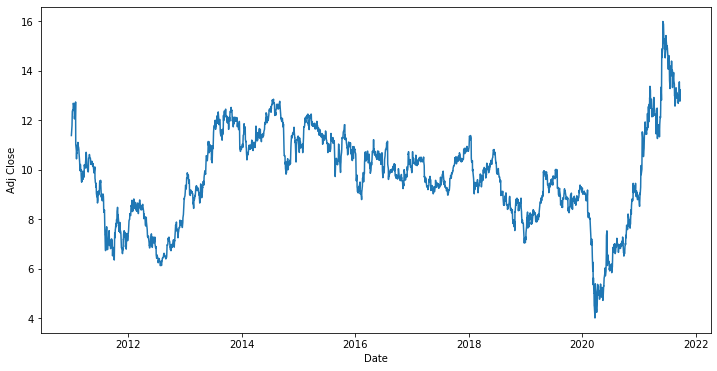

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y=df['Adj Close'])

<AxesSubplot:xlabel='Date'>

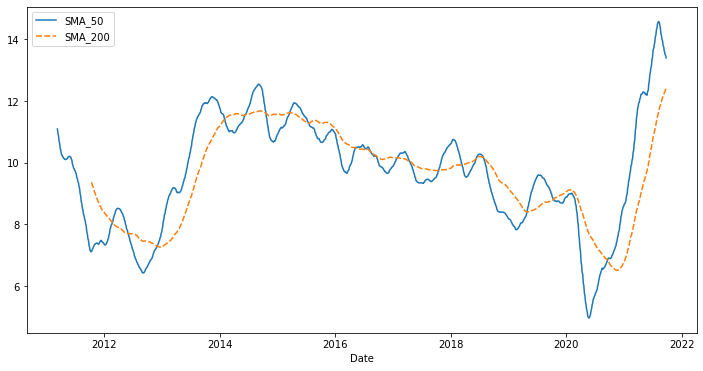

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df[['SMA_50', 'SMA_200']])

In [16]:
len(df)

2700

In [17]:
ind = df[199:]

In [18]:
ind

,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200
Date,,,,,,,,
2011-10-14,11.58,11.67,11.34,11.56,7.836226,54535700,7.123509,9.363340
2011-10-17,11.71,11.76,11.32,11.40,7.727764,53715600,7.131101,9.345072
2011-10-18,11.41,11.93,11.27,11.78,7.985357,66804200,7.156182,9.326532
2011-10-19,11.77,11.92,11.46,11.56,7.836226,69510100,7.164994,9.306806
2011-10-20,11.66,11.75,11.47,11.70,7.931127,62145700,7.182484,9.285825
...,...,...,...,...,...,...,...,...
2021-09-16,13.18,13.53,13.10,13.40,13.400000,76426100,13.503600,12.341750
2021-09-17,13.41,13.70,13.39,13.55,13.550000,76182400,13.493400,12.363300
2021-09-20,13.07,13.19,12.63,12.82,12.820000,126152200,13.460200,12.381400


In [25]:
ind['Signal'] = 0
ind['Signal'] = np.where(ind['SMA_50'] > ind['SMA_200'], 1, ind['Signal'])

<ipython-input-25-3bdcb2867e7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind['Signal'] = 0
<ipython-input-25-3bdcb2867e7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind['Signal'] = np.where(ind['SMA_50'] > ind['SMA_200'], 1, ind['Signal'])


In [26]:
ind['Indicator'] = ind['Signal'].diff()

<ipython-input-26-dedcc2be4ccc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind['Indicator'] = ind['Signal'].diff()


In [27]:
ind["Indicator"].value_counts()

 0.0    2481
 1.0      10
-1.0       9
Name: Indicator, dtype: int64

<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

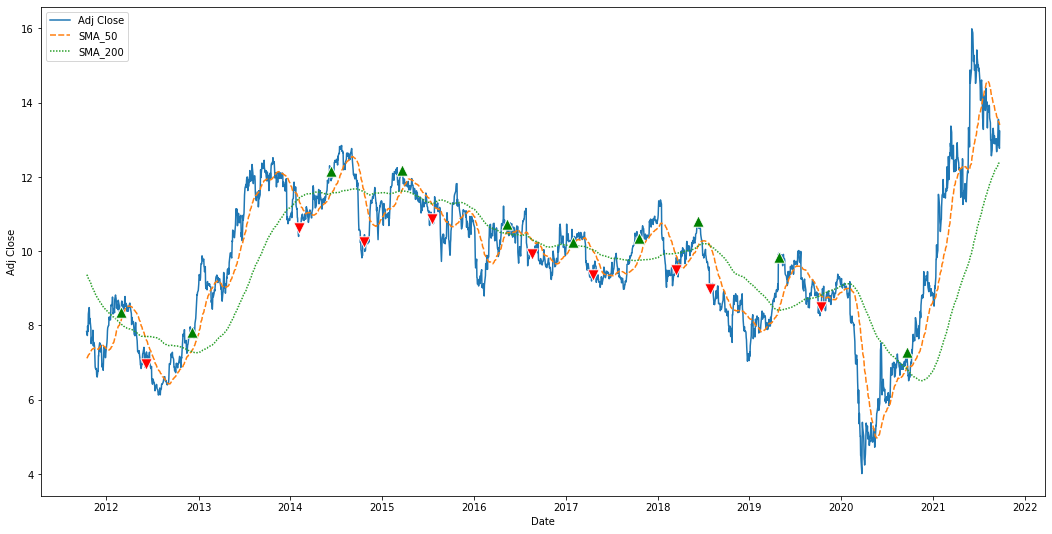

In [28]:
plt.figure(figsize=(18,9))
sns.lineplot(data=ind[['Adj Close','SMA_50', 'SMA_200']])
sns.scatterplot(x=ind[ind['Indicator'] == 1.0].index, y=ind[ind['Indicator'] == 1.0]['Adj Close'], marker="^", s=130, color='green', zorder=4)
sns.scatterplot(x=ind[ind['Indicator'] == -1.0].index, y=ind[ind['Indicator'] == -1.0]['Adj Close'], marker="v", s=130, color='red', zorder=4)

In [23]:
ind[ind['Indicator'] == 1.0]['Adj Close']

Series([], Name: Adj Close, dtype: float64)

In [ ]:
ind[ind['Indicator'] == -1.0]['Adj Close']

In [ ]:
ind[ind['Indicator'] == 1.0]['Adj Close'].sum()

In [ ]:
ind[ind['Indicator'] == -1.0]['Adj Close'].sum()+13